In [28]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 

sns.set_theme()

from datetime import datetime, timedelta
from src.models import SimulateStatement, Model
from src.modelstats import ModelStats
from src.plots import plot_volatilities
from dataclasses import dataclass
from src.crop import crop_statements_until_t_by_politician, crop_statements_until_t
from datetime import datetime
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from src.modelstats import ModelStats


data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

lambd = 0.1
delta = 0.01
lag = 20

date_of_reckoning = datetime(2019,7,10)
cut_data_at_time = datetime(2019,5,12)
probability_analysis = ModelStats(data_path, data_deputados_path, simulate_time = cut_data_at_time)

probability_analysis = probability_analysis.get_votes(lambd, delta, lag, date_of_reckoning )
probability_analysis = probability_analysis.get_changes()
probability_analysis = probability_analysis.get_fluxes()

ids = probability_analysis.get_politicians()
probability_analysis= probability_analysis.get_statement_volatility()

tau = probability_analysis.get_all_statements_per_politician(267)

A_trajectories, O_trajectories, all_trajectories, set_probability = probability_analysis.calculate_single_vote_probability(np.int64(267))

7it [00:00, 116.47it/s]
7it [00:00, 57009.96it/s]
100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


running sliding window


100%|██████████| 120/120 [00:00<00:00, 191.97it/s]


In [46]:
def get_high_statement_volatility_politicians(probability_analysis):
    high_volatility_ids = [int(i ) for i, v in probability_analysis.from_politician_to_volatility.items() if 0.5 < v < 1]
    return high_volatility_ids

high_volatility_ids = get_high_statement_volatility_politicians(probability_analysis)

high_volatility_politican_info = [probability_analysis.get_politician(i) for i in high_volatility_ids]

from_name_to_id_high_vol = {info['NOME'].values[0]: int(info['Id_politico'].values[0]) for info in high_volatility_politican_info}
from_id_to_name_high_vol = {v: k for k, v in high_volatility_dict.items()}
from_id_to_name_high_vol


{470: 'MARCOS PEREIRA',
 195: 'MARCELO ARO',
 74: 'CAPITAO WAGNER',
 48: 'JOAO ROMA',
 286: 'FERNANDO MONTEIRO',
 267: 'RUBENS BUENO',
 20: 'CAMILO CAPIBERIBE',
 379: 'JERONIMO GOERGEN',
 175: 'MARIO HERINGER',
 428: 'RODRIGO COELHO',
 30: 'MARCELO RAMOS',
 281: 'DANIEL COELHO',
 150: 'JOSE MEDEIROS',
 341: 'MARCELO FREIXO',
 86: 'LEONIDAS CRISTINO',
 486: 'RODRIGO AGOSTINHO',
 501: 'FABIO MITIDIERI',
 297: 'SILVIO COSTA FILHO',
 77: 'DOMINGOS NETO',
 355: 'JORGE BRAZ',
 491: 'TABATA AMARAL'}

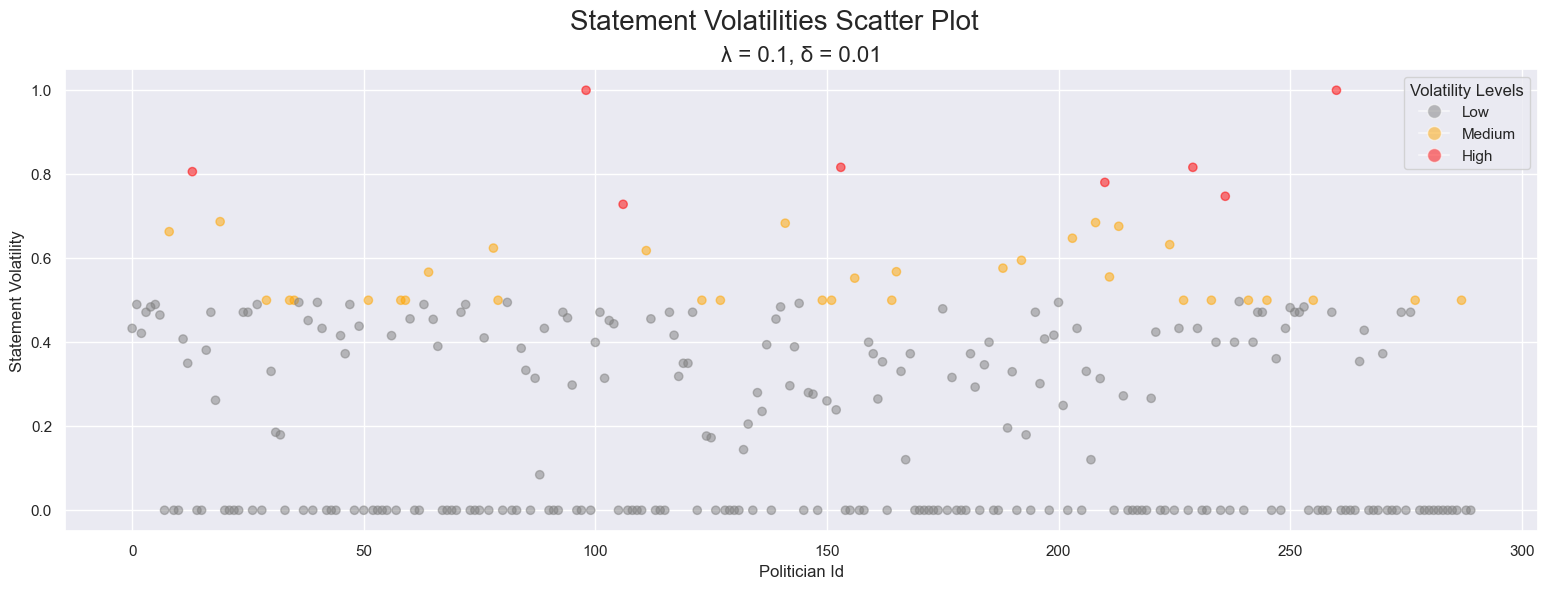

In [13]:
plot_volatilities(probability_analysis)

simulating for imperfect knowledge at each d iteration

In [39]:
date_of_reckoning = datetime(2019,9,12)

first_cut_data_at_time = datetime(2019, 5, 1)

data_time_cuts = [first_cut_data_at_time + i*timedelta(days = 20) for i in range(8)]

 

running models at different timecuts


In [48]:
def get_probability_evolution(politican_id):

    from_time_cut_to_analysis = {}
    from_time_cut_to_probability = {}

    for time_cut in tqdm(data_time_cuts):

        opinion_analysis = ModelStats(data_path, data_deputados_path, simulate_time = time_cut)
        opinion_analysis = opinion_analysis.get_votes(lambd, delta, lag, date_of_reckoning )
        opinion_analysis = opinion_analysis.get_changes()
        opinion_analysis = opinion_analysis.get_fluxes()

        from_time_cut_to_analysis[time_cut] = opinion_analysis

        # return opinion_analysis
        A_trajectories, O_trajectories, all_trajectories, set_probability = opinion_analysis.calculate_single_vote_probability(int(politican_id))
        from_time_cut_to_probability[time_cut] = set_probability

    return from_time_cut_to_probability


# from_time_cut_to_probability


def plot_prob_evolution(name, from_time_cut_to_probability):

    date_of_reckoning
    # Extract dates and probabilities for plotting
    dates = list(from_time_cut_to_probability.keys())
    A_probabilities = [from_time_cut_to_probability[date]['A'] for date in dates]
    O_probabilities = [from_time_cut_to_probability[date]['O'] for date in dates]

    # Plot the time series
    plt.figure(figsize=(12, 6))
    plt.plot(dates, A_probabilities, label='A Probability', marker='o')
    plt.plot(dates, O_probabilities, label='O Probability', marker='o')
    plt.axvline(x=date_of_reckoning, color='r', linestyle='--', label='Date of Reckoning')
    plt.xlabel('Date')
    plt.ylabel('Probability')
    plt.title(name + ' - Time Series of A and O Probabilities')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


  0%|          | 0/8 [00:00<?, ?it/s]

6it [00:00, 151.11it/s]
6it [00:00, 45839.39it/s]
100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


running sliding window


100%|██████████| 100/100 [00:00<00:00, 164.74it/s]
7it [00:00, 127.14it/s]0:06<00:47,  6.78s/it]
7it [00:00, 49261.96it/s]
100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


running sliding window


100%|██████████| 120/120 [00:00<00:00, 157.81it/s]
8it [00:00, 102.43it/s]0:14<00:44,  7.46s/it]
8it [00:00, 59705.40it/s]
100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


running sliding window


100%|██████████| 140/140 [00:00<00:00, 142.26it/s]
9it [00:00, 105.49it/s]0:23<00:41,  8.25s/it]
9it [00:00, 60787.01it/s]
100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


running sliding window


100%|██████████| 160/160 [00:01<00:00, 130.99it/s]
10it [00:00, 95.87it/s]0:34<00:36,  9.11s/it]
10it [00:00, 58173.43it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 131.88it/s]
10it [00:00, 96.12it/s]0:45<00:30, 10.02s/it]
10it [00:00, 52038.51it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 135.81it/s]
10it [00:00, 97.17it/s]0:57<00:21, 10.55s/it]
10it [00:00, 59158.03it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 136.79it/s]
10it [00:00, 61.38it/s]1:09<00:10, 10.88s/it]
10it [00:00, 53773.13it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 8/8 [01:20<00:00, 10.08s/it]


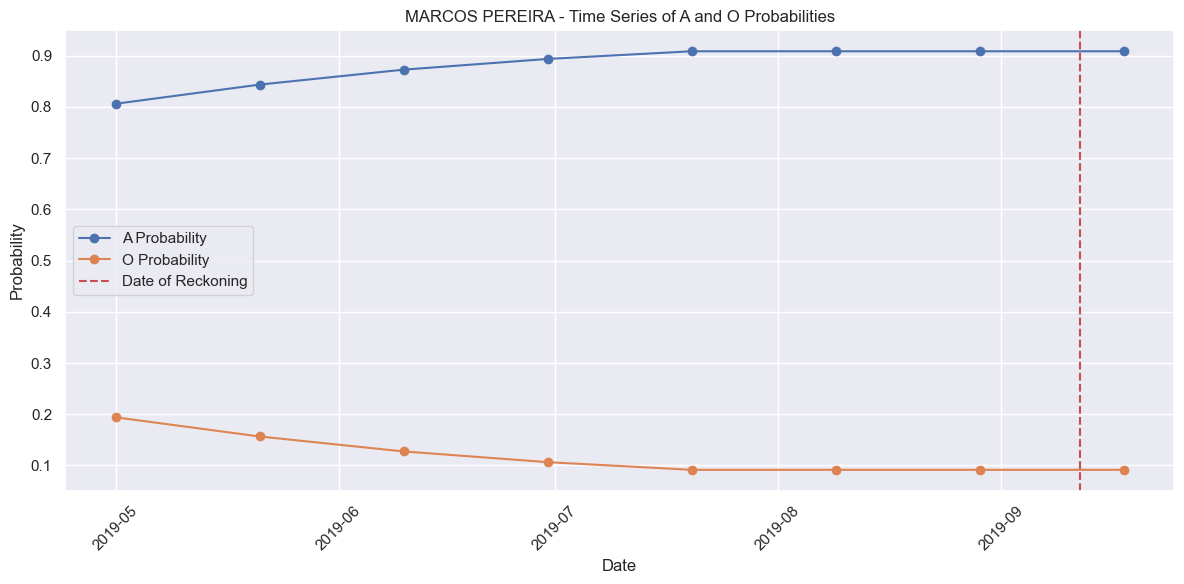

6it [00:00, 153.11it/s]0:00<?, ?it/s]
6it [00:00, 53204.70it/s]
100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


running sliding window


100%|██████████| 100/100 [00:00<00:00, 174.57it/s]
7it [00:00, 122.66it/s]0:06<00:47,  6.72s/it]
7it [00:00, 57456.22it/s]
100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


running sliding window


100%|██████████| 120/120 [00:00<00:00, 158.15it/s]
8it [00:00, 111.76it/s]0:14<00:44,  7.45s/it]
8it [00:00, 51941.85it/s]
100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


running sliding window


100%|██████████| 140/140 [00:00<00:00, 154.71it/s]
9it [00:00, 105.12it/s]0:23<00:41,  8.21s/it]
9it [00:00, 57022.26it/s]
100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


running sliding window


100%|██████████| 160/160 [00:01<00:00, 144.46it/s]
10it [00:00, 93.41it/s]0:34<00:36,  9.04s/it]
10it [00:00, 58497.96it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 143.05it/s]
10it [00:00, 91.42it/s]0:45<00:29,  9.96s/it]
10it [00:00, 54050.31it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 137.69it/s]
10it [00:00, 63.38it/s]0:57<00:21, 10.50s/it]
10it [00:00, 55260.92it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 106.91it/s]
10it [00:00, 52.93it/s]1:09<00:10, 10.99s/it]
10it [00:00, 49228.92it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 8/8 [01:20<00:00, 10.12s/it]


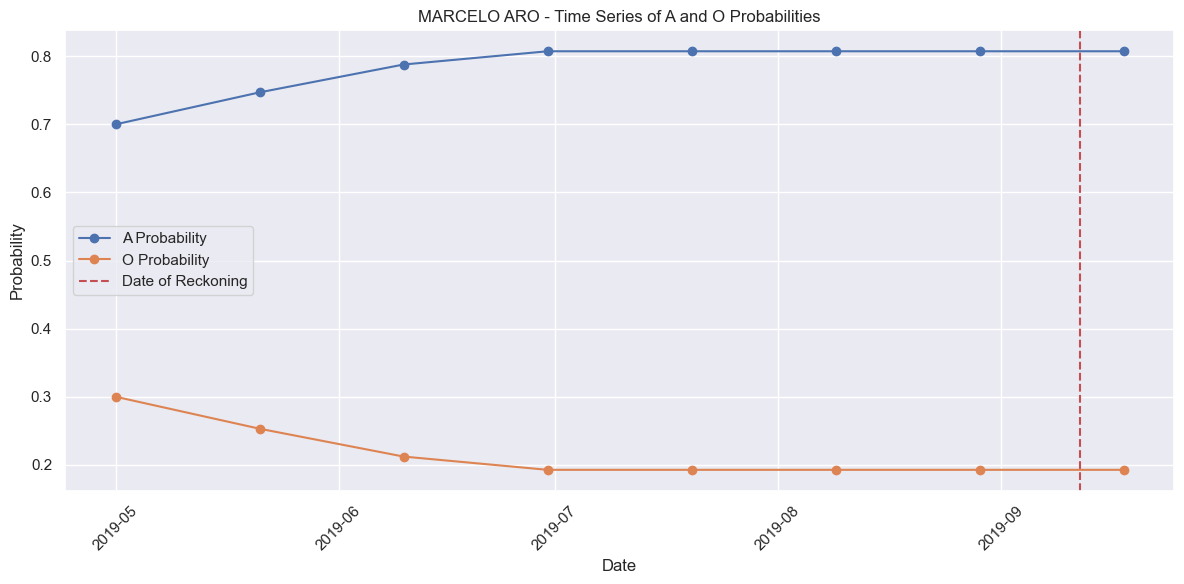

6it [00:00, 132.30it/s]0:00<?, ?it/s]
6it [00:00, 54947.21it/s]
100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


running sliding window


100%|██████████| 100/100 [00:00<00:00, 175.44it/s]
7it [00:00, 127.55it/s]0:06<00:47,  6.74s/it]
7it [00:00, 49261.96it/s]
100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


running sliding window


100%|██████████| 120/120 [00:00<00:00, 149.87it/s]
8it [00:00, 110.18it/s]0:14<00:44,  7.47s/it]
8it [00:00, 51542.91it/s]
100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


running sliding window


100%|██████████| 140/140 [00:00<00:00, 155.23it/s]
9it [00:00, 102.17it/s]0:23<00:41,  8.22s/it]
9it [00:00, 55512.85it/s]
100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


running sliding window


100%|██████████| 160/160 [00:01<00:00, 136.94it/s]
10it [00:00, 96.96it/s]0:34<00:36,  9.08s/it]
10it [00:00, 54971.22it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 115.65it/s]
10it [00:00, 94.51it/s]0:46<00:30, 10.06s/it]
10it [00:00, 58092.85it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 124.79it/s]
10it [00:00, 80.53it/s]0:57<00:21, 10.61s/it]
10it [00:00, 49286.77it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 144.74it/s]
10it [00:00, 58.16it/s]1:09<00:10, 10.91s/it]
10it [00:00, 51781.53it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 8/8 [01:20<00:00, 10.11s/it]


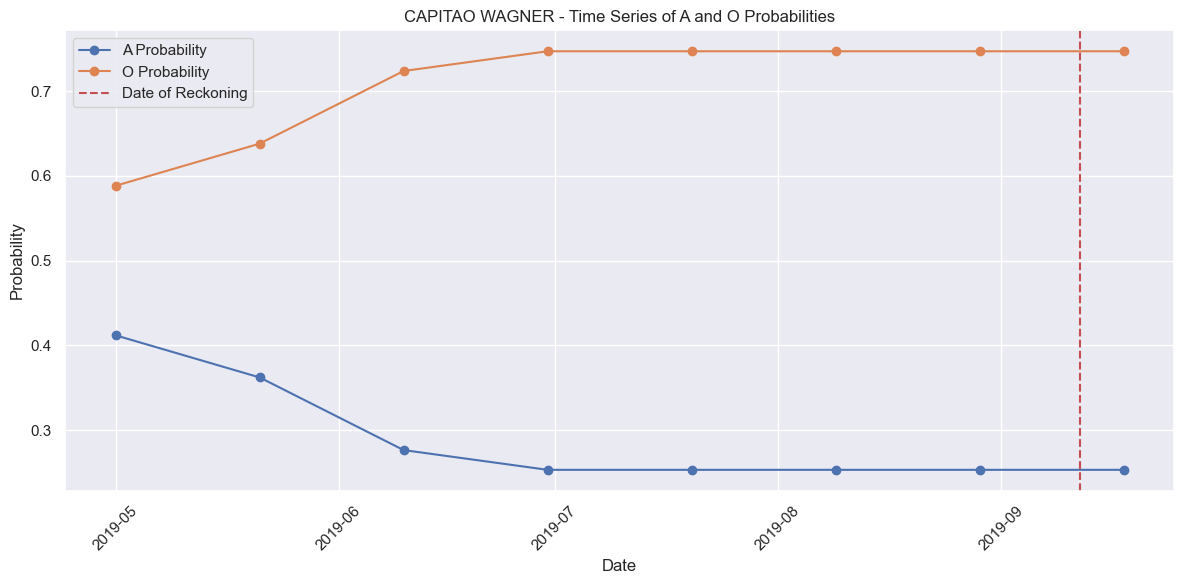

6it [00:00, 155.88it/s]0:00<?, ?it/s]
6it [00:00, 53544.31it/s]
100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


running sliding window


100%|██████████| 100/100 [00:00<00:00, 174.79it/s]
7it [00:00, 125.29it/s]0:06<00:46,  6.71s/it]
7it [00:00, 45661.16it/s]
100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


running sliding window


100%|██████████| 120/120 [00:00<00:00, 158.14it/s]
8it [00:00, 114.22it/s]0:14<00:44,  7.43s/it]
8it [00:00, 51941.85it/s]
100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


running sliding window


100%|██████████| 140/140 [00:00<00:00, 144.72it/s]
9it [00:00, 102.41it/s]0:23<00:41,  8.21s/it]
9it [00:00, 57368.90it/s]
100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


running sliding window


100%|██████████| 160/160 [00:01<00:00, 119.16it/s]
10it [00:00, 84.63it/s]0:34<00:36,  9.15s/it]
10it [00:00, 55553.70it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 109.86it/s]
10it [00:00, 87.59it/s]0:46<00:30, 10.14s/it]
10it [00:00, 54120.05it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 135.15it/s]
10it [00:00, 91.57it/s]0:57<00:21, 10.63s/it]
10it [00:00, 58092.85it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 139.51it/s]
10it [00:00, 100.21it/s]:09<00:10, 10.93s/it]
10it [00:00, 56148.65it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 8/8 [01:21<00:00, 10.16s/it]


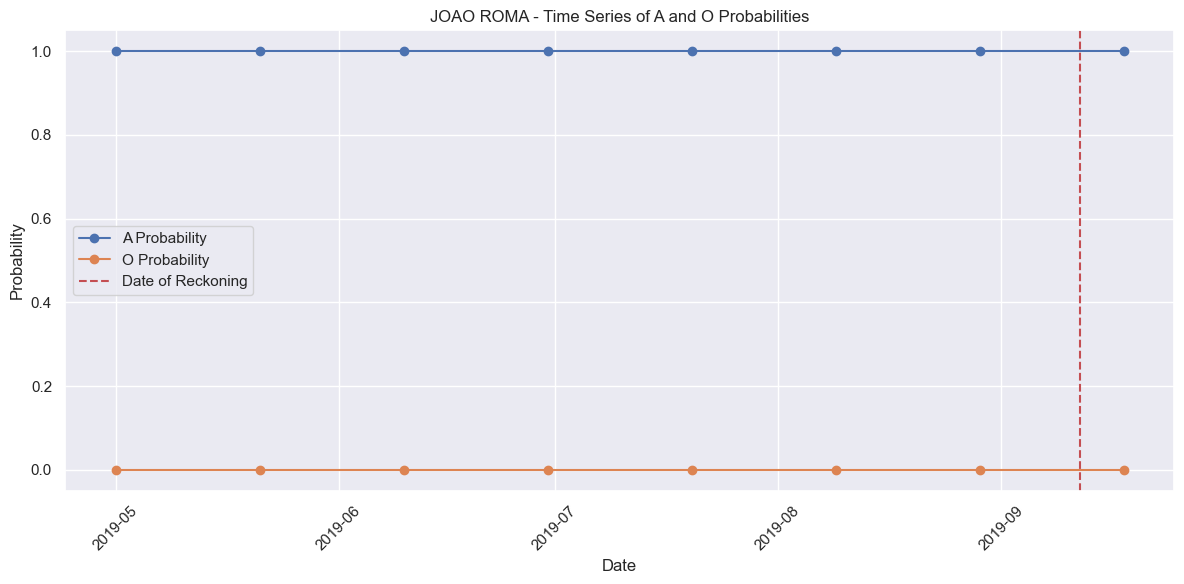

6it [00:00, 157.87it/s]0:00<?, ?it/s]
6it [00:00, 57719.78it/s]
100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


running sliding window


100%|██████████| 100/100 [00:00<00:00, 160.72it/s]
7it [00:00, 131.33it/s]0:06<00:47,  6.76s/it]
7it [00:00, 53871.79it/s]
100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


running sliding window


100%|██████████| 120/120 [00:00<00:00, 166.54it/s]
8it [00:00, 121.35it/s]0:14<00:44,  7.42s/it]
8it [00:00, 57554.77it/s]
100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


running sliding window


100%|██████████| 140/140 [00:00<00:00, 156.70it/s]
9it [00:00, 105.89it/s]0:23<00:40,  8.18s/it]
9it [00:00, 60397.98it/s]
100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


running sliding window


100%|██████████| 160/160 [00:01<00:00, 150.35it/s]
10it [00:00, 102.38it/s]:34<00:36,  9.01s/it]
10it [00:00, 55260.92it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 132.25it/s]
10it [00:00, 102.15it/s]:45<00:29,  9.95s/it]
10it [00:00, 56073.58it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 146.01it/s]
10it [00:00, 102.68it/s]:57<00:20, 10.47s/it]
10it [00:00, 61052.46it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 147.01it/s]
10it [00:00, 101.95it/s]:08<00:10, 10.79s/it]
10it [00:00, 58826.14it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 8/8 [01:20<00:00, 10.01s/it]


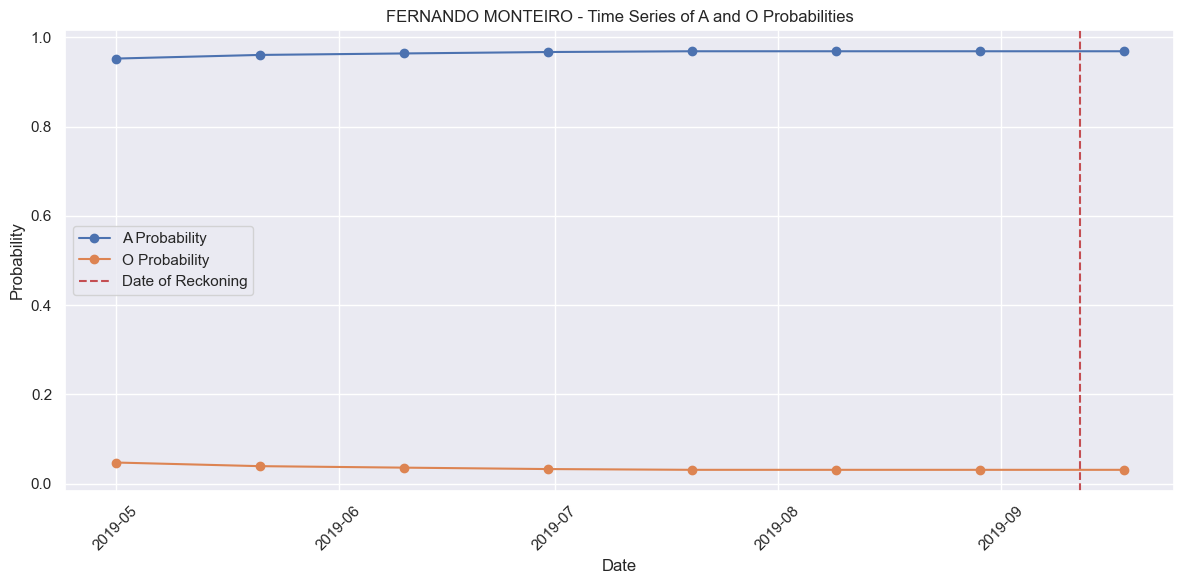

6it [00:00, 156.40it/s]0:00<?, ?it/s]
6it [00:00, 51254.22it/s]
100%|██████████| 6/6 [00:06<00:00,  1.01s/it]


running sliding window


100%|██████████| 100/100 [00:00<00:00, 166.13it/s]
7it [00:00, 130.58it/s]0:06<00:47,  6.75s/it]
7it [00:00, 56353.41it/s]
100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


running sliding window


100%|██████████| 120/120 [00:00<00:00, 147.46it/s]
8it [00:00, 85.47it/s]00:14<00:44,  7.48s/it]
8it [00:00, 44620.26it/s]
100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


running sliding window


100%|██████████| 140/140 [00:00<00:00, 141.49it/s]
9it [00:00, 103.09it/s]0:23<00:41,  8.27s/it]
9it [00:00, 54158.88it/s]
100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


running sliding window


100%|██████████| 160/160 [00:01<00:00, 143.40it/s]
10it [00:00, 87.81it/s]0:34<00:36,  9.09s/it]
10it [00:00, 58497.96it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 133.45it/s]
10it [00:00, 96.03it/s]0:45<00:29, 10.00s/it]
10it [00:00, 62045.92it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 140.52it/s]
10it [00:00, 100.31it/s]:57<00:21, 10.52s/it]
10it [00:00, 54899.27it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


running sliding window


100%|██████████| 180/180 [00:01<00:00, 141.50it/s]
10it [00:00, 101.42it/s]:08<00:10, 10.85s/it]
10it [00:00, 53227.21it/s]


In [ ]:

# get_probability_evolution(high_volatility_dict['ARTHUR LIRA'])

for politican in high_volatility_ids:
    from_time_cut_to_probability = get_probability_evolution(politican)
    name = from_id_to_name_high_vol[politican]
    plot_prob_evolution(name, from_time_cut_to_probability)

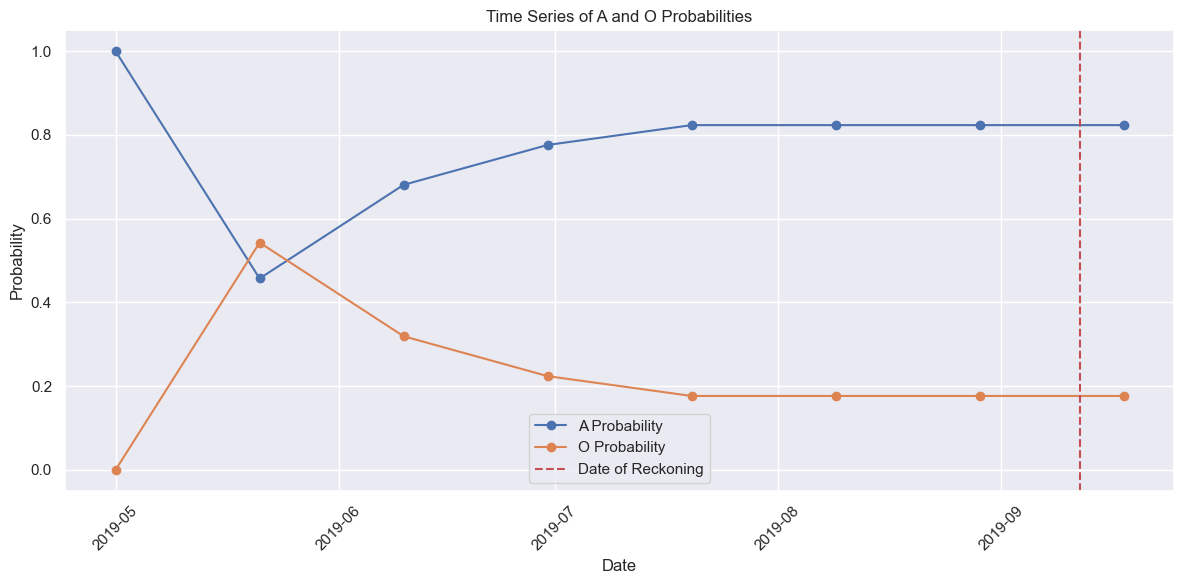

In [ ]:

plot_prob_evolution(from_time_cut_to_probability)

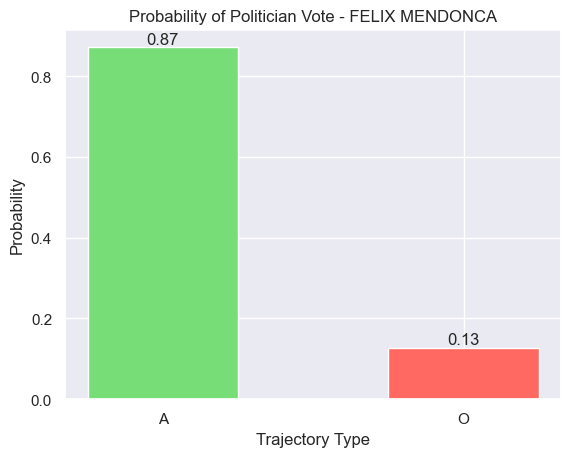

In [19]:
# set_probability
bars = plt.bar(set_probability.keys(), set_probability.values(), width=0.5, color=['#77dd77', '#ff6961'])
plt.xlabel('Trajectory Type')
plt.ylabel('Probability')
plt.title('Probability of Politician Vote - ' + probability_analysis.get_politician_names()[267])

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [5]:
df = pd.read_csv("data/DATA_FINAL.csv")
df.time = pd.to_datetime(df.time)
df = df.sort_values(by=['time'])

In [5]:
tau = crop_statements_until_t_by_politician(df,'2019-07-11 15:30:16', 422)

In [ ]:

data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

probability_analysis = ModelStats(data_path, data_deputados_path)

lambd = 0.6
delta = 0.3
lag = 10


In [8]:
probability_analysis  = probability_analysis.get_votes(lambd, delta, lag, datetime(2020,1,1))

19it [00:00, 63.74it/s]


In [9]:
from datetime import datetime
from dataclasses import dataclass
from typing import List

@dataclass
class PoliticianOpinion:
    politician_name: str
    opinion_score: float

@dataclass
class PoliticiansOpinionInTime:
    politician_opinions: List[PoliticianOpinion]
    datetime: datetime

def get_politician_trajectories(opinions_in_time: List[PoliticiansOpinionInTime], politician_name: str):
    """
    Get all different trajectories of opinions for a single politician.

    Parameters:
    - opinions_in_time: List of PoliticiansOpinionInTime instances.
    - politician_name: The name of the politician.

    Returns:
    - A list of trajectories for the specified politician.
    """
    politician_trajectories = []

    # Iterate through the list of opinions_in_time
    for opinion_in_time in opinions_in_time:
        datetime_point = opinion_in_time.datetime
        # Find the politician's opinion at this datetime_point
        politician_opinion = next((opinion.opinion_score for opinion in opinion_in_time.politician_opinions
                                   if opinion.politician_name == politician_name), None)

        if politician_opinion is not None:
            # Append the datetime_point and opinion to the trajectories
            politician_trajectories.append((datetime_point, politician_opinion))

    return politician_trajectories

# Example usage:
opinions_data = [
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.8), PoliticianOpinion("Politician2", 0.5)], datetime(2023, 1, 1)),
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.7), PoliticianOpinion("Politician2", 0.6)], datetime(2023, 1, 2)),
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.6), PoliticianOpinion("Politician2", 0.7)], datetime(2023, 1, 3)),
]

politician_name_to_check = "Politician1"
trajectories = get_politician_trajectories(opinions_data, politician_name_to_check)

print(f"Opinion trajectories for {politician_name_to_check}: {trajectories}")


Opinion trajectories for Politician1: [(datetime.datetime(2023, 1, 1, 0, 0), 0.8), (datetime.datetime(2023, 1, 2, 0, 0), 0.7), (datetime.datetime(2023, 1, 3, 0, 0), 0.6)]


In [ ]:
@dataclass
class OpinionHistogram:
    """Class for identifying a single politician opinion"""
    bins: list[int]
    opinion: list[int] 

@dataclass
class ScoreHistogram:
    """Class for identifying a single politician opinion"""
    politician_id: list[int]
    opinion: list[int]